$$ ITI \space AI-Pro: \space Intake \space 45 $$
$$ Deep \space Learning $$
$$ Lab \space no. \space 3 $$

# `01` Assignment 01
- Design your own `deep NN` to classify the `CIFAR 10` images (you can download from keras.dataset) into one of the 10 classes
- Investigate the use of different architectures (`different layers`, `learning rate`, `optimizers`, `loss function`)
- Note you will need to `flatten` the image and use it as your input vector

## `+` Import Libraries

In [2]:
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, BatchNormalization, Activation, Dropout
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.callbacks import EarlyStopping



In [4]:
# import tensorflow as tf
# import time

# # Assign computation to GPU
# with tf.device('/GPU:0'):
#     a = tf.random.normal([1000, 1000])
#     b = tf.random.normal([1000, 1000])

#     start = time.time()
#     c = tf.matmul(a, b)
#     end = time.time()

# print("Matrix multiplication completed on GPU in:", end - start, "seconds")


## `+` Load & Preprocess CIFAR 10 Dataset

In [5]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [6]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of X_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


### Preview the Images

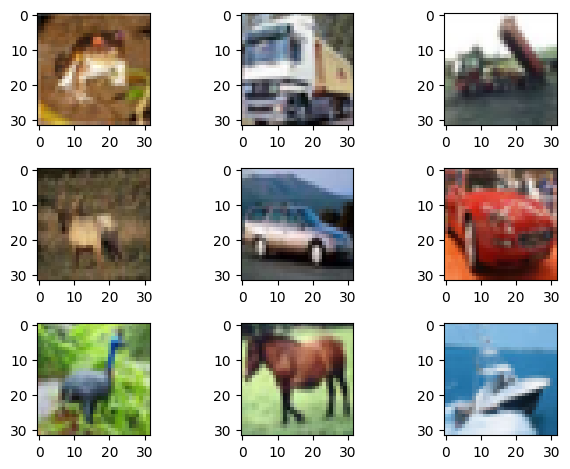

In [7]:
# plot first few images
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.xticks(range(0, 40, 10))
    plt.imshow(X_train[i])
plt.tight_layout()
plt.show()
    

### Feature Rescaling

In [8]:
# Rescale Input
X_train = X_train / 255.0
X_test  = X_test / 255.0

### OneHotEncode Target Variable

In [9]:
encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train).toarray()
y_test  = encoder.fit_transform(y_test).toarray()

## `+` Set Global Parameters

In [10]:
# Hyperparameters
BATCH_SIZE  = 128
NUM_CLASSES = 10
EPOCHS      = 50
LEARNING_RATE = 0.001

## `i` Trial no. 1

### Model Training

In [11]:
model = Sequential()
model.add(Input(shape=X_train.shape[1:]))
model.add(Flatten())
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

I0000 00:00:1743338794.787693   25737 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4145 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       196,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 199,338 (778.66 KB)

 Trainable params: 199,210 (778.16 KB)

 Non-trainable params: 128 (512.00 B)

In [12]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='categorical_crossentropy', metrics=['accuracy', 'Precision'])

In [13]:
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

Epoch 1/50


I0000 00:00:1743338797.095431   25828 service.cc:152] XLA service 0x721740004250 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1743338797.095450   25828 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-03-30 14:46:37.128042: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1743338797.257287   25828 cuda_dnn.cc:529] Loaded cuDNN version 90300


 92/391 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.4624 - accuracy: 0.2472 - loss: 2.1311

I0000 00:00:1743338800.503883   25828 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - Precision: 0.5706 - accuracy: 0.3135 - loss: 1.9393 - val_Precision: 0.6206 - val_accuracy: 0.3852 - val_loss: 1.7084
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Precision: 0.6456 - accuracy: 0.4229 - loss: 1.6371 - val_Precision: 0.6563 - val_accuracy: 0.4247 - val_loss: 1.6318
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Precision: 0.6758 - accuracy: 0.4542 - loss: 1.5331 - val_Precision: 0.4423 - val_accuracy: 0.3476 - val_loss: 1.8475
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Precision: 0.6967 - accuracy: 0.4784 - loss: 1.4816 - val_Precision: 0.6162 - val_accuracy: 0.4349 - val_loss: 1.5956
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Precision: 0.6937 - accuracy: 0.4827 - loss: 1.4528 - val_Precision: 0.6389 - val_accuracy: 0.4338 - val_loss: 1.5781
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Precision: 0.7026 - accuracy: 0.5030 - loss: 1.4086 - val_Precision: 0.6546 - val_accuracy: 0.4

### Model Evaluation

In [14]:
loss, accuracy, precision = model.evaluate(X_train, y_train)
print(f"Accuracy: {accuracy}")

loss, accuracy, precision = model.evaluate(X_test, y_test)
print(f"Loss: {accuracy}")


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - Precision: 0.7073 - accuracy: 0.5509 - loss: 1.2523
Accuracy: 0.552619993686676
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.5710 - accuracy: 0.4442 - loss: 1.7649
Loss: 0.4401000142097473


### Result Visualization

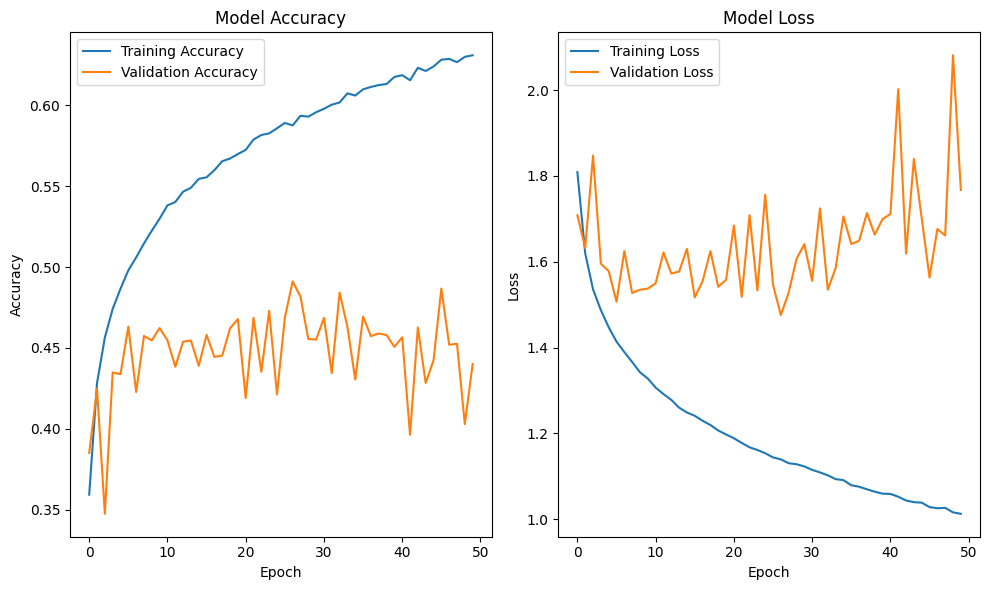

In [15]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

## `ii` Trial no. 2

### Model Training

In [16]:
model = Sequential()
model.add(Input(shape=X_train.shape[1:]))
model.add(Flatten())
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(NUM_CLASSES, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       196,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 199,706 (780.10 KB)

 Trainable params: 199,578 (779.60 KB)

 Non-trainable params: 128 (512.00 B)

In [17]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001), loss='mse', metrics=['accuracy', 'Precision'])
# sparse_categorical_crossentropy can not be applied because data is one hot encoded

In [18]:
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - Precision: 0.5779 - accuracy: 0.2524 - loss: 0.0848 - val_Precision: 0.6533 - val_accuracy: 0.3323 - val_loss: 0.0788
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Precision: 0.6368 - accuracy: 0.3693 - loss: 0.0763 - val_Precision: 0.6215 - val_accuracy: 0.3609 - val_loss: 0.0762
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Precision: 0.6662 - accuracy: 0.4049 - loss: 0.0729 - val_Precision: 0.6094 - val_accuracy: 0.3887 - val_loss: 0.0739
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Precision: 0.6844 - accuracy: 0.4287 - loss: 0.0706 - val_Precision: 0.7273 - val_accuracy: 0.4019 - val_loss: 0.0727
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Precision: 0.6846 - accuracy: 0.4518 - loss: 0.0691 - val_Precision: 0.6162 - val_accuracy: 0.3744 - val_loss: 0.0762
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Precision: 0.7061 - accuracy: 0.4687 - loss: 0.0672 - val_Precision: 0.4539 - val_acc

### Model Evaluation

In [19]:
loss, accuracy, precision = model.evaluate(X_train, y_train)
print(f"Accuracyof the train : {accuracy}")

loss, accuracy, precision = model.evaluate(X_test, y_test)
print(f"accuracy of the test : {accuracy}")


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - Precision: 0.7418 - accuracy: 0.5932 - loss: 0.0541
Accuracyof the train : 0.5920600295066833
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.5835 - accuracy: 0.4645 - loss: 0.0714
accuracy of the test : 0.4611999988555908


### Result Visualization

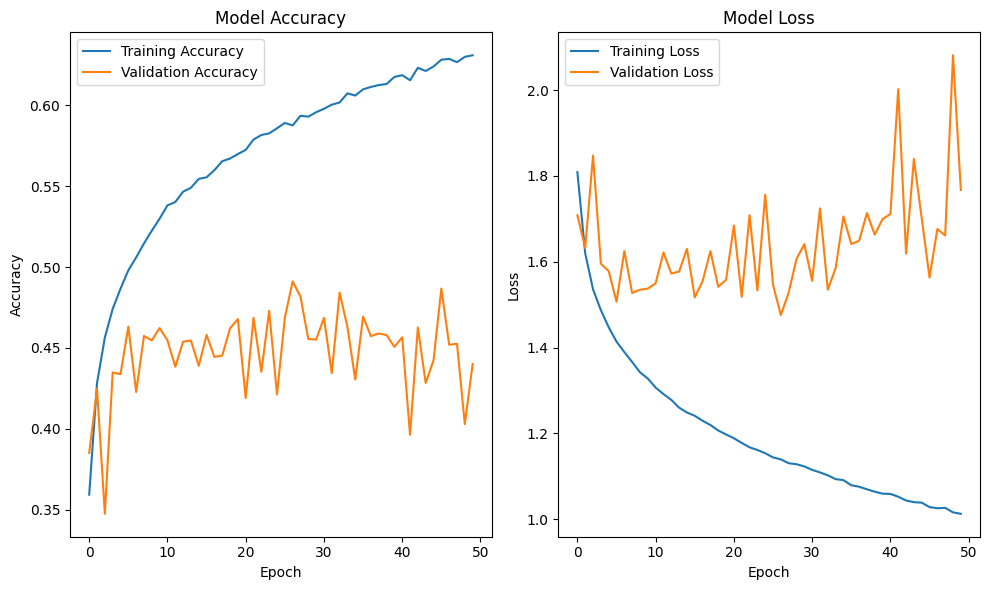

In [20]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

### `We can see that the Adam and cross entopy loss is better  than the RMSprop and the MSE`

**Note:** Add more trials and explore different hyperparameters and design decisions.

------------------------------

# Assignment 02: Transfer Learning
- Design your `deep convolutional neural network` to classify the `CIFAR 10` images into one of the 10 classes
- Use a pre-trained model to boost your network.
- Invistage the use of different architectures (different `layers`, `kernel sizes`, `pooling`, `learning rate`, `optimizers`, `loss function`)

You have to specify filters and kernel_size. These parameters have no default.

Default padding is valid, which means no zero-padding, and the default strides is (1,1).

$\frac{N - F + 2P}{S} + 1$

$P = \frac{F - 1}{2}$

## `i` Trial no. 1

### Model Training

In [21]:
base_model = keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=X_train.shape[1:])
base_model.trainable = False

In [22]:
model = Sequential([
    base_model,
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [23]:
model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/50
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3756 - loss: 1.7718

2025-03-30 14:48:36.870402: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1409', 52 bytes spill stores, 52 bytes spill loads



391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3758 - loss: 1.7712

2025-03-30 14:48:41.039498: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_220', 4 bytes spill stores, 4 bytes spill loads

2025-03-30 14:48:41.159633: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_220', 4 bytes spill stores, 4 bytes spill loads



391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.3760 - loss: 1.7707 - val_accuracy: 0.5414 - val_loss: 1.3141
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5329 - loss: 1.3417 - val_accuracy: 0.5648 - val_loss: 1.2403
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5609 - loss: 1.2565 - val_accuracy: 0.5740 - val_loss: 1.2017
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5728 - loss: 1.2222 - val_accuracy: 0.5827 - val_loss: 1.1849
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5871 - loss: 1.1830 - val_accuracy: 0.5896 - val_loss: 1.1677
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5930 - loss: 1.1679 - val_accuracy: 0.5954 - val_loss: 1.1487
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.6019 - loss: 1.1430 - val_accuracy: 0.6021 - val_loss: 1.1317
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.6075 - loss: 1.1281 - val_accuracy: 0.59

### Model Evaluation

In [24]:
# loss and accuracy
loss, accuracy = model.evaluate(X_train, y_train)
print(f"Accuracy of train : {accuracy}")

loss, accuracy = model.evaluate(X_test, y_test)
print(f"accuracy of test : {accuracy}")

2025-03-30 14:55:03.908337: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_220', 4 bytes spill stores, 4 bytes spill loads



1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7732 - loss: 0.6694
Accuracy of train : 0.7712600231170654
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6221 - loss: 1.0981
accuracy of test : 0.628600001335144


### Result Visualization

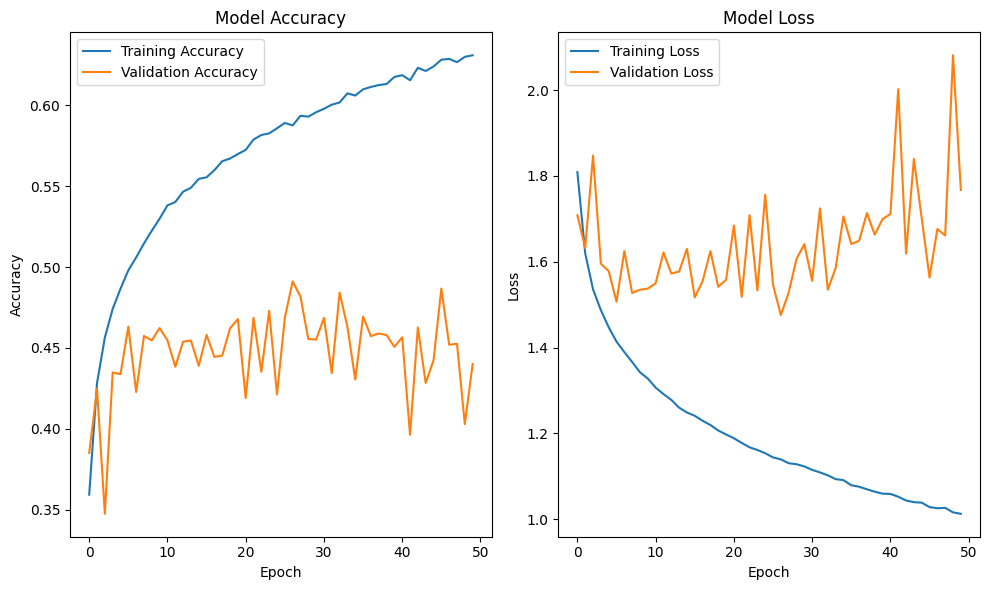

In [25]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

## `ii` Trial no. 2

### Model Training

In [26]:
from tensorflow.keras.callbacks import EarlyStopping    

early_stopping = EarlyStopping(monitor='val_loss',  # Track validation loss
                               patience=5,          # Stop after 5 epochs with no improvement
                               restore_best_weights=True)  # Restore best weights

In [27]:
from keras.applications.resnet_v2 import ResNet50V2
pre_trained = ResNet50V2(include_top=False, pooling='avg', weights='imagenet')

# Unfreeze some layers of the base model for fine-tuning
base_model.trainable = False

In [28]:
# Build the model
model = Sequential()
model.add(pre_trained)
model.add(Flatten())
model.add(Dense(512, kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256, kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))

# Compile the model with a smaller learning rate
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE * 0.1), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)         │ (None, 2048)           │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,750,858 (94.42 MB)

 Trainable params: 24,703,882 (94.24 MB)

 Non-trainable params: 46,976 (183.50 KB)

In [29]:
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50


2025-03-30 14:55:38.659506: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_15538', 76 bytes spill stores, 76 bytes spill loads

2025-03-30 14:55:38.939662: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_15538', 2916 bytes spill stores, 2892 bytes spill loads

2025-03-30 14:55:39.234550: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_15538_0', 120 bytes spill stores, 120 bytes spill loads

2025-03-30 14:55:39.290347: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_15538', 3072 bytes spill stores, 3056 bytes spill loads

2025-03-30 14:55:39.3299

390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.1227 - loss: 12.7271

2025-03-30 14:56:12.820337: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_15538', 116 bytes spill stores, 116 bytes spill loads

2025-03-30 14:56:12.856375: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_19953', 408 bytes spill stores, 408 bytes spill loads

2025-03-30 14:56:13.006978: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_15538', 64 bytes spill stores, 64 bytes spill loads

2025-03-30 14:56:13.018558: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_15538', 4 bytes spill stores, 4 bytes spill loads

2025-03-30 14:56:13.041906: I exte

391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.1228 - loss: 12.7235

2025-03-30 14:56:32.629955: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1590_0', 4 bytes spill stores, 4 bytes spill loads

2025-03-30 14:56:32.822319: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1590', 76 bytes spill stores, 76 bytes spill loads

2025-03-30 14:56:33.540192: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1590', 468 bytes spill stores, 468 bytes spill loads

2025-03-30 14:56:33.615430: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1590_0', 1532 bytes spill stores, 1484 bytes spill loads

2025-03-30 14:56:33.750177: I ex

391/391 ━━━━━━━━━━━━━━━━━━━━ 80s 123ms/step - accuracy: 0.1229 - loss: 12.7199 - val_accuracy: 0.2756 - val_loss: 8.9661
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.2723 - loss: 8.2285 - val_accuracy: 0.5277 - val_loss: 6.0261
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.5348 - loss: 5.5616 - val_accuracy: 0.6543 - val_loss: 4.2253
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.6787 - loss: 3.9003 - val_accuracy: 0.7006 - val_loss: 3.1384
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.7614 - loss: 2.8021 - val_accuracy: 0.7312 - val_loss: 2.4048
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.8155 - loss: 2.0352 - val_accuracy: 0.7377 - val_loss: 1.9239
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.8616 - loss: 1.4562 - val_accuracy: 0.7469 - val_loss: 1.5810
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.8874 - loss: 1.0619 - val_accur

### Model Evaluation

In [30]:
# loss and accuracy
loss, accuracy = model.evaluate(X_train, y_train)
print(f"Accuracy of train : {accuracy}")

loss, accuracy = model.evaluate(X_test, y_test)
print(f"accuracy of test : {accuracy}")

2025-03-30 15:01:27.172992: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1579', 204 bytes spill stores, 204 bytes spill loads

2025-03-30 15:01:27.213884: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1579_0', 396 bytes spill stores, 2300 bytes spill loads

2025-03-30 15:01:27.580143: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1590', 188 bytes spill stores, 188 bytes spill loads

2025-03-30 15:01:27.675384: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1579', 3940 bytes spill stores, 3920 bytes spill loads

2025-03-30 15:01:28.183441:

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9819 - loss: 0.1179
Accuracy of train : 0.9821199774742126
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7704 - loss: 1.0229
accuracy of test : 0.7674000263214111


### Result Visualization

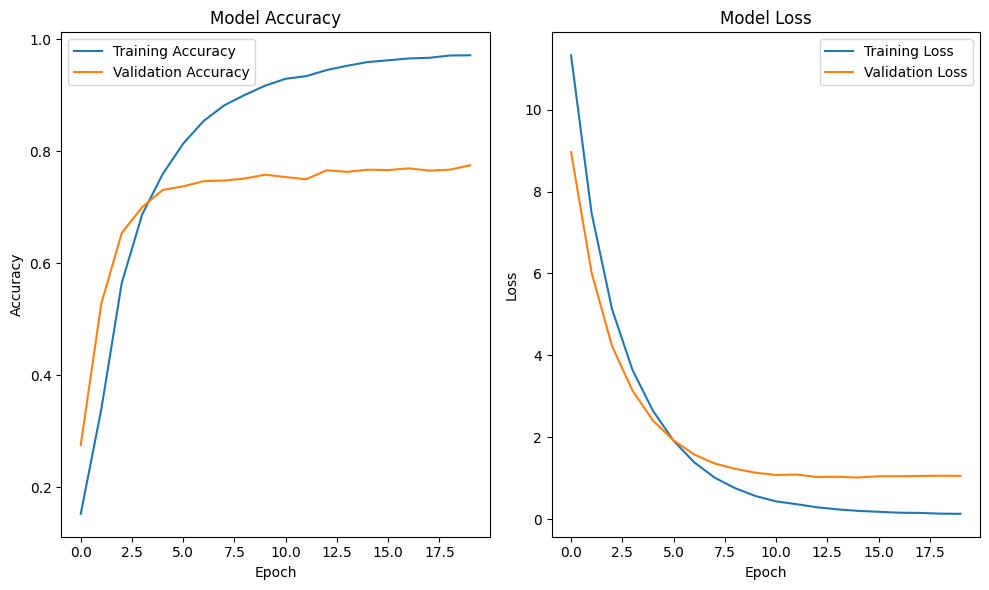

In [31]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

---

# `03` Assignment 03
- Repeat Assignment 1 and 2 using MNIST dataset but do NOT use transfer learning this time (design the network from scratch)
- Note that you will need to convert the training labels into categorical using one hot encoding using `to_categorical()` function

## `+` Load MNIST Dataset

In [32]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [33]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


### OneHotEncode Target Variable

In [34]:
# try to_categorical one hot encoding from keras instead of one hot encoding from sklearn
y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test, NUM_CLASSES)

### Preview the Images

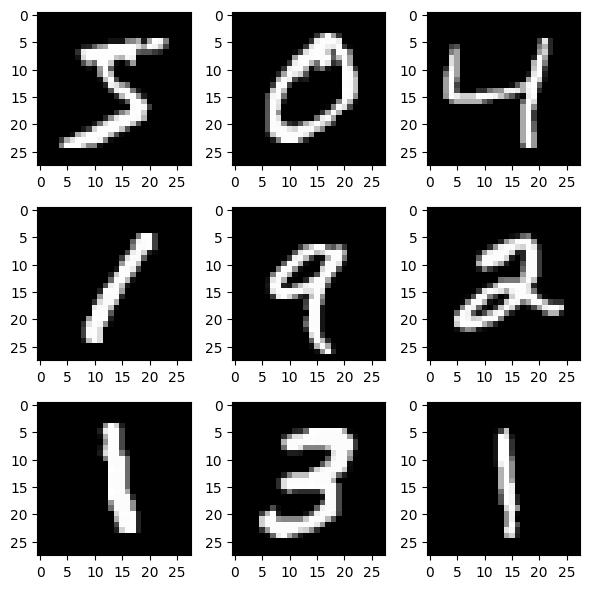

In [35]:
fig, axes = plt.subplots(3, 3, figsize=(6, 6))  # 3x3 grid

for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.xticks(range(0, 40, 10))
    ax = plt.gca()  # Get current axis
    ax.set_xticks(range(0, 35, 5))  # X-axis from 0 to 30 with step 5
    ax.set_yticks(range(0, 35, 5))  # Y-axis from 0 to 30 with step 5
    plt.imshow(X_train[i], cmap='gray', vmin=0, vmax=255)

plt.tight_layout()

### Rescale Independent Features

In [36]:
# Rescale the Input
X_train = X_train / 255.0
X_test = X_test / 255.0

## `+` Set Global Parameters

In [37]:
# Hyperparameters
BATCH_SIZE  = 128
NUM_CLASSES = 10
EPOCHS      = 50

## `i` ANN Trials

### Trial no. 1

#### Model Training

In [38]:
model = Sequential()
model.add(Input(shape=X_train.shape[1:]))
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(NUM_CLASSES, activation='softmax'))


In [39]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='categorical_crossentropy', metrics=['accuracy', 'Precision'])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,282 (438.60 KB)

 Trainable params: 111,898 (437.10 KB)

 Non-trainable params: 384 (1.50 KB)

In [40]:
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
437/469 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.9039 - accuracy: 0.6113 - loss: 1.1731

2025-03-30 15:01:51.384561: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_454', 16 bytes spill stores, 16 bytes spill loads

2025-03-30 15:01:51.706896: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1601', 124 bytes spill stores, 124 bytes spill loads

2025-03-30 15:01:52.872097: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1601', 184 bytes spill stores, 184 bytes spill loads

2025-03-30 15:01:53.407167: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1601', 124 bytes spill stores, 124 bytes spill loads

2025-03-30 15:01:53.655379: I exter

469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - Precision: 0.9051 - accuracy: 0.6230 - loss: 1.1411 - val_Precision: 0.9616 - val_accuracy: 0.9471 - val_loss: 0.1927
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Precision: 0.9469 - accuracy: 0.9154 - loss: 0.3085 - val_Precision: 0.9641 - val_accuracy: 0.9554 - val_loss: 0.1629
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Precision: 0.9588 - accuracy: 0.9383 - loss: 0.2256 - val_Precision: 0.9780 - val_accuracy: 0.9724 - val_loss: 0.1094
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Precision: 0.9667 - accuracy: 0.9500 - loss: 0.1832 - val_Precision: 0.9785 - val_accuracy: 0.9729 - val_loss: 0.1099
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Precision: 0.9715 - accuracy: 0.9574 - loss: 0.1572 - val_Precision: 0.9763 - val_accuracy: 0.9713 - val_loss: 0.1126
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Precision: 0.9722 - accuracy: 0.9605 - loss: 0.1398 - val_Precision: 0.9762 - val_accuracy: 0.9

In [41]:
loss, accuracy, precision = model.evaluate(X_train, y_train)
print(f"Accuracy of train : {accuracy}")

loss, accuracy, precision = model.evaluate(X_test, y_test)
print(f"accuracy of test : {accuracy}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - Precision: 0.9924 - accuracy: 0.9904 - loss: 0.0328
Accuracy of train : 0.9902833104133606
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.9758 - accuracy: 0.9730 - loss: 0.1113
accuracy of test : 0.9769999980926514


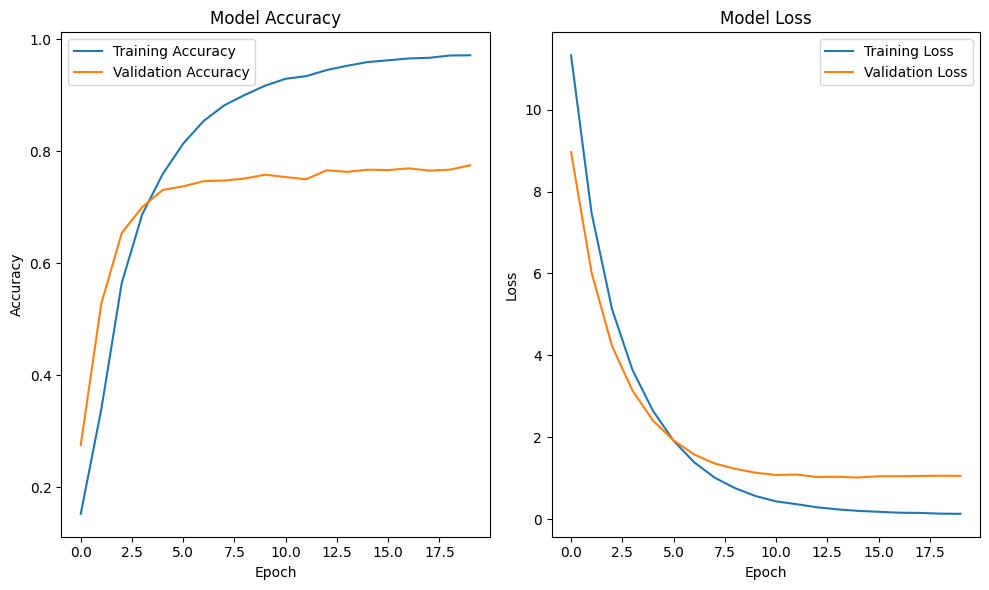

In [42]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

### Trial no. 2

#### Model Training

In [44]:
model = Sequential()
model.add(Input(shape=X_train.shape[1:]))
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [45]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=LEARNING_RATE), loss='mse', metrics=['accuracy', 'Precision'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,282 (438.60 KB)

 Trainable params: 111,898 (437.10 KB)

 Non-trainable params: 384 (1.50 KB)

In [46]:
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - Precision: 0.8678 - accuracy: 0.4829 - loss: 0.0614 - val_Precision: 0.9503 - val_accuracy: 0.9295 - val_loss: 0.0108
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Precision: 0.9318 - accuracy: 0.8747 - loss: 0.0186 - val_Precision: 0.9648 - val_accuracy: 0.9543 - val_loss: 0.0071
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Precision: 0.9503 - accuracy: 0.9155 - loss: 0.0128 - val_Precision: 0.9685 - val_accuracy: 0.9599 - val_loss: 0.0062
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Precision: 0.9575 - accuracy: 0.9335 - loss: 0.0104 - val_Precision: 0.9680 - val_accuracy: 0.9617 - val_loss: 0.0061
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Precision: 0.9619 - accuracy: 0.9447 - loss: 0.0088 - val_Precision: 0.9749 - val_accuracy: 0.9701 - val_loss: 0.0049
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Precision: 0.9668 - accuracy: 0.9532 - loss: 0.0076 - val_Precision: 0.9719 - val_accu

#### Model Evaluation

In [47]:
loss, accuracy, precision = model.evaluate(X_train, y_train)
print(f"Accuracy of train : {accuracy}")

loss, accuracy, precision = model.evaluate(X_test, y_test)
print(f"accuracy of test : {accuracy}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - Precision: 0.9899 - accuracy: 0.9881 - loss: 0.0020
Accuracy of train : 0.9876833558082581
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.9762 - accuracy: 0.9726 - loss: 0.0044
accuracy of test : 0.9764999747276306


#### Result Visualization

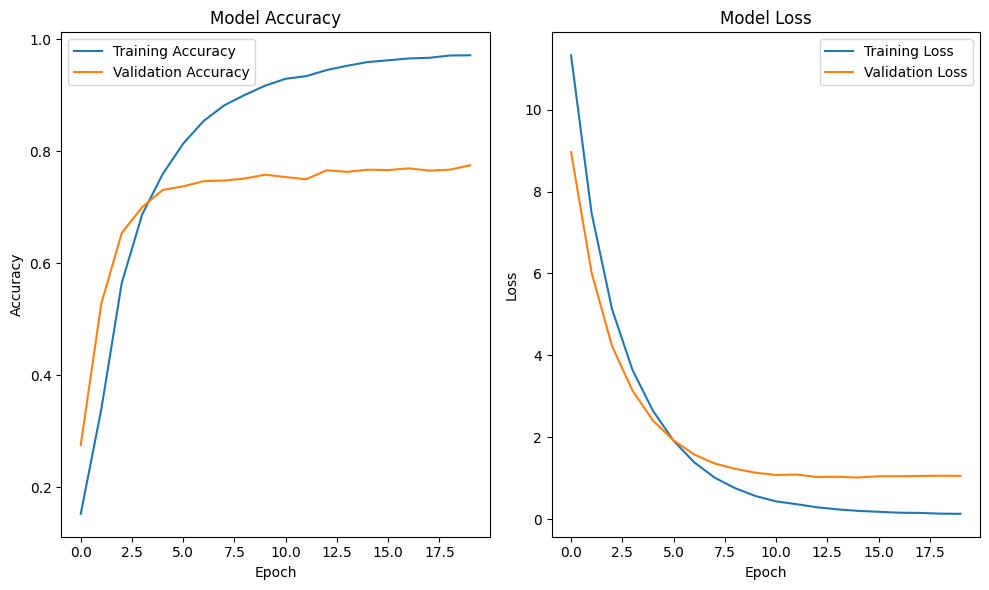

In [48]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

## `ii` CNN Trials

### Trial no. 1

#### Datasets Reshaping

In [49]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

#### Model Training

In [50]:
## CNN Model

model = Sequential()
model.add(Input(shape=X_train.shape[1:]))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))



In [58]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9968 - loss: 0.0107 - val_accuracy: 0.9908 - val_loss: 0.0296
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9973 - loss: 0.0078 - val_accuracy: 0.9919 - val_loss: 0.0343
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9977 - loss: 0.0068 - val_accuracy: 0.9908 - val_loss: 0.0368
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9983 - loss: 0.0050 - val_accuracy: 0.9924 - val_loss: 0.0277
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9983 - loss: 0.0045 - val_accuracy: 0.9903 - val_loss: 0.0440
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9980 - loss: 0.0068 - val_accuracy: 0.9887 - val_loss: 0.0436
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9976 - loss: 0.0061 - val_accuracy: 0.9907 - val_loss: 0.0373
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9983 - loss: 0.0044 - val_accuracy: 0.

#### Model Evaluation

In [60]:
loss, accuracy = model.evaluate(X_train, y_train)
print(f"Accuracy of train : {accuracy}")

loss, accuracy = model.evaluate(X_test, y_test)
print(f"accuracy of test : {accuracy}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9987 - loss: 0.0036
Accuracy of train : 0.9986833333969116
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9902 - loss: 0.0352
accuracy of test : 0.9923999905586243


#### Result Visualization

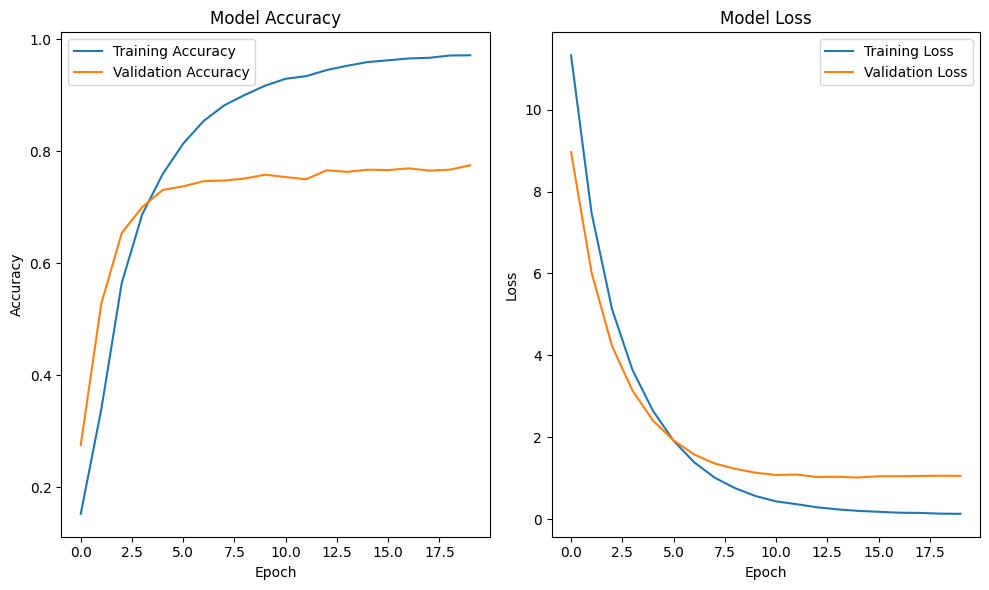

In [61]:
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

### Trial no. 2

#### Model Training

In [62]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy', 'Precision'])
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50


2025-03-30 15:14:44.249515: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_603', 4 bytes spill stores, 4 bytes spill loads



464/469 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.9991 - accuracy: 0.9990 - loss: 1.4796e-04

2025-03-30 15:14:47.575054: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_603', 8 bytes spill stores, 8 bytes spill loads



469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - Precision: 0.9991 - accuracy: 0.9990 - loss: 1.4736e-04 - val_Precision: 0.9939 - val_accuracy: 0.9935 - val_loss: 0.0011
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Precision: 0.9998 - accuracy: 0.9998 - loss: 3.9522e-05 - val_Precision: 0.9937 - val_accuracy: 0.9936 - val_loss: 0.0011
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Precision: 0.9999 - accuracy: 0.9999 - loss: 1.3040e-05 - val_Precision: 0.9934 - val_accuracy: 0.9934 - val_loss: 0.0011
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Precision: 1.0000 - accuracy: 1.0000 - loss: 9.1337e-06 - val_Precision: 0.9933 - val_accuracy: 0.9932 - val_loss: 0.0010
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Precision: 1.0000 - accuracy: 1.0000 - loss: 4.4782e-06 - val_Precision: 0.9939 - val_accuracy: 0.9938 - val_loss: 0.0010
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Precision: 1.0000 - accuracy: 1.0000 - loss: 3.4315e-06 - val_Precision: 0.99

#### Model Evaluation

In [64]:
loss, accuracy, precision = model.evaluate(X_train, y_train)
print(f"Accuracy of train : {accuracy}")

loss, accuracy, precision = model.evaluate(X_test, y_test)
print(f"accuracy of test : {accuracy}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - Precision: 1.0000 - accuracy: 1.0000 - loss: 2.9712e-06
Accuracy of train : 1.0
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.9921 - accuracy: 0.9920 - loss: 0.0014
accuracy of test : 0.9937999844551086


#### Result Visualization

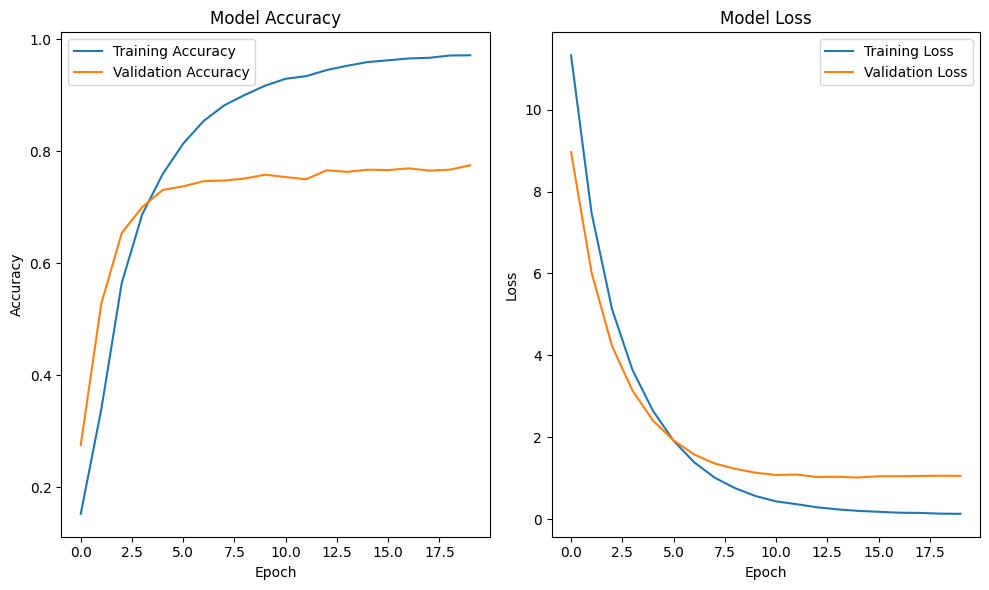

In [65]:
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$